

# **PIA: Entrenamiento de Red Neuronal Convolucional**

*   Ana Paula Cantú Díaz 1663389
*   Armando Morales Olivares 1986674
*   David Guajardo García 1830137
*   Dylan Jesús Cepeda González 1942496

* Hiram Said Bravo Moreno 1818152



In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

169017344/169001437 [==============================] - 3s 0us/step


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

In [ ]:
superclass_names = ['aquatic-mammals', 'fish', 'flowers', 'food-containers', 'fruit and vegetables',
                    'household-electrical-devices', 'household-furniture', 'insects', 'large carnivores', 'large man-made outdoor things',
                    'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people',
                    'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium-fish', 'flatfish', 'ray', 'shark', 'trout',
               'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet-peppers',
               'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
               'bed', 'chair', 'couch', 'table', 'wardrobe',
               'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
               'bear', 'leopard', 'lion', 'tiger', 'wolf',
               'bridge', 'castle', 'house', 'road', 'skyscraper',
               'cloud', 'forest', 'mountain', 'plain', 'sea',
               'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
               'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
               'crab', 'lobster', 'snail', 'spider', 'worm',
               'baby', 'boy', 'girl', 'man', 'woman',
               'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
               'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
               'maple', 'oak', 'palm', 'pine', 'willow',
               'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
               'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.figure(figsize=(32,32))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[test_labels[i][0]])
  plt.ylabel(superclass_names[train_labels[i][0]])
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [ ]:
model.summary()

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

In [ ]:
model.summary()

In [23]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 134s 86ms/step - loss: 2.6097 - accuracy: 0.2267 - val_loss: 2.3004 - val_accuracy: 0.2966
Epoch 2/10
1563/1563 [==============================] - 131s 83ms/step - loss: 2.2206 - accuracy: 0.3175 - val_loss: 2.1382 - val_accuracy: 0.3376
Epoch 3/10
1563/1563 [==============================] - 133s 85ms/step - loss: 2.0702 - accuracy: 0.3615 - val_loss: 2.0622 - val_accuracy: 0.3581
Epoch 4/10
1563/1563 [==============================] - 134s 85ms/step - loss: 1.9575 - accuracy: 0.3943 - val_loss: 2.0149 - val_accuracy: 0.3810
Epoch 5/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.8479 - accuracy: 0.4248 - val_loss: 2.0203 - val_accuracy: 0.3904
Epoch 6/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.7480 - accuracy: 0.4533 - val_loss: 2.0212 - val_accuracy: 0.3884
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.6507 - accuracy: 0.4834 - val_loss: 2.1769 - val

313/313 - 6s - loss: 2.2796 - accuracy: 0.3922 - 6s/epoch - 18ms/step


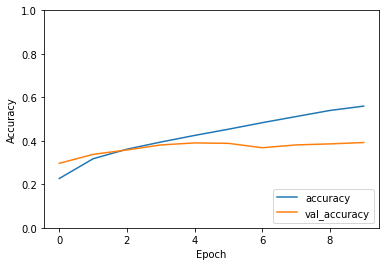

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)